### Setup inicial

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('OK')

OK


In [235]:
years = ['2009', '2019']

def create_paths_for_many_years(years, file_base_name):
    paths = dict()
    for year in years:
        paths[year] = '{}/dados/{}.CSV'.format(year, file_base_name)
    return paths
    
def read_datasets_for_many_years(years, paths):
    dfs = dict()
    for year in years:
        dfs[year] = pd.read_csv(filepath_or_buffer=paths[year], sep='|', engine='python', encoding=encoding)
    return dfs

teacher_paths = create_paths_for_many_years(years, 'SUP_DOCENTE')   

encoding='ISO-8859-1'

def get_federals(df):
    public  = df[df["TP_CATEGORIA_ADMINISTRATIVA"].isin([1])]
    return public

#ies_paths = _2019_path + 'SUP_IES_2019.CSV'
#curso_paths = _2019_path + 'SUP_CURSO_2019.CSV'
#aluno_paths = _2019_path + 'SUP_ALUNO_2019.CSV'


print(teacher_paths)

{'2009': '2009/dados/SUP_DOCENTE.CSV', '2019': '2019/dados/SUP_DOCENTE.CSV'}


### teachers

In [236]:
teachers = read_datasets_for_many_years(years, teacher_paths)

In [237]:
columns = ['CO_CATEGORIA_ADMINISTRATIVA', 'CO_SITUACAO_DOCENTE', 'CO_ESCOLARIDADE_DOCENTE', 'IN_SEXO_DOCENTE', 'CO_COR_RACA_DOCENTE', 'IN_DOCENTE_DEFICIENCIA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO']
teachers['2009'] = teachers['2009'][columns]

In [238]:
### 2009 adjusts
columns = {
    'CO_CATEGORIA_ADMINISTRATIVA': 'TP_CATEGORIA_ADMINISTRATIVA', 
    'CO_SITUACAO_DOCENTE': 'TP_SITUACAO',
    'CO_ESCOLARIDADE_DOCENTE': 'TP_ESCOLARIDADE',
    'IN_SEXO_DOCENTE': 'TP_SEXO',
    'CO_COR_RACA_DOCENTE': 'TP_COR_RACA',
    'IN_DOCENTE_DEFICIENCIA': 'IN_DEFICIENCIA'
}
teachers['2009'].rename(columns=columns, inplace=True)
teachers['2009']['NU_ANO_CENSO'] = pd.Series([2009 for x in range(len(teachers['2009'].index))])

teachers['2009']['TP_CATEGORIA_ADMINISTRATIVA'] = teachers['2009']['TP_CATEGORIA_ADMINISTRATIVA'].replace({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada', 5: 'Privada', 6: 'Privada'})
teachers['2009']['TP_SEXO'] = teachers['2009']['TP_SEXO'].replace({0: 'Masculino', 1: 'Feminino'})

teachers['2009'].head()

,TP_CATEGORIA_ADMINISTRATIVA,TP_SITUACAO,TP_ESCOLARIDADE,TP_SEXO,TP_COR_RACA,IN_DEFICIENCIA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,NU_ANO_CENSO
0,Federal,1,3,Masculino,1,0,0.0,0.0,2009
1,Federal,1,5,Feminino,1,0,0.0,0.0,2009
2,Federal,1,4,Feminino,1,0,0.0,0.0,2009
3,Federal,1,4,Masculino,6,0,0.0,0.0,2009
4,Federal,1,4,Masculino,0,0,0.0,0.0,2009


In [239]:
### 2019 adjusts

columns = ['NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_SITUACAO', 'TP_ESCOLARIDADE', 'TP_SEXO', 'TP_COR_RACA', 'IN_DEFICIENCIA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO']
teachers['2019'] = teachers['2019'][columns]
teachers['2019']['TP_CATEGORIA_ADMINISTRATIVA'] = teachers['2019']['TP_CATEGORIA_ADMINISTRATIVA'].replace({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada', 5: 'Privada', 6: 'Privada', 7: 'Especial', 8: 'Privada', 9: 'Privada'})
teachers['2019']['TP_SEXO'] = teachers['2019']['TP_SEXO'].replace({1: 'Feminino', 2: 'Masculino'})

In [240]:
### multiple adjusts

df = pd.concat([teachers['2009'], teachers['2019']])
df['TP_SITUACAO'] = df['TP_SITUACAO'].replace({1: 'Em exercício', 2: 'Afastado para qualificação', 3: 'Afastado por outros motivos', 4: 'Afastado por outros motivos', 5: 'Afastado por outros motivos', 6: 'Falecido'})
df['TP_ESCOLARIDADE'] = df['TP_ESCOLARIDADE'].replace({1: 'Sem graduação', 2: 'Graduação', 3: 'Especialização', 4: 'Mestrado', 5: 'Doutorado'})
df['TP_COR_RACA'] = df['TP_COR_RACA'].replace({0: 'Não quis declarar', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não dispõe da informação', 9: 'Não dispõe da informação'})
df['IN_DEFICIENCIA'] = df['IN_DEFICIENCIA'].replace({0: False, 1: True, 9: None})
df['IN_BOLSA_PESQUISA'] = df['IN_BOLSA_PESQUISA'].replace({0: False, 1: True})
df['IN_SUBSTITUTO'] = df['IN_SUBSTITUTO'].replace({0: False, 1: True})

df.rename(columns={'TP_CATEGORIA_ADMINISTRATIVA': 'Categoria Administrativa', 'TP_SITUACAO': 'Situação', 'TP_ESCOLARIDADE': 'Escolaridade', 'TP_SEXO': 'Sexo', 'TP_COR_RACA': 'Raça', 'NU_ANO_CENSO': 'Ano', 'IN_DEFICIENCIA': 'Deficiência', 'IN_BOLSA_PESQUISA': 'Bolsa Pesquisa', 'IN_SUBSTITUTO': 'Substituto'}, inplace=True)

df.head()

,Categoria Administrativa,Situação,Escolaridade,Sexo,Raça,Deficiência,Bolsa Pesquisa,Substituto,Ano
0,Federal,Em exercício,Especialização,Masculino,Branca,False,False,False,2009
1,Federal,Em exercício,Doutorado,Feminino,Branca,False,False,False,2009
2,Federal,Em exercício,Mestrado,Feminino,Branca,False,False,False,2009
3,Federal,Em exercício,Mestrado,Masculino,Não dispõe da informação,False,False,False,2009
4,Federal,Em exercício,Mestrado,Masculino,Não quis declarar,False,False,False,2009


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758517 entries, 0 to 399427
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Categoria Administrativa  758517 non-null  object
 1   Situação                  758517 non-null  object
 2   Escolaridade              758517 non-null  object
 3   Sexo                      758517 non-null  object
 4   Raça                      758517 non-null  object
 5   Deficiência               715141 non-null  object
 6   Bolsa Pesquisa            470661 non-null  object
 7   Substituto                734072 non-null  object
 8   Ano                       758517 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 57.9+ MB


In [242]:
df.isna().sum()

Categoria Administrativa         0
Situação                         0
Escolaridade                     0
Sexo                             0
Raça                             0
Deficiência                  43376
Bolsa Pesquisa              287856
Substituto                   24445
Ano                              0
dtype: int64

Quantos são os teachers de cada categoria administrativa?

In [248]:
count_by_race_and_year_df = df[(df['Situação'] == 'Em exercício') & (df['Raça'] != 'Não dispõe da informação') & (df['Raça'] != 'Não quis declarar')].groupby(['Ano', 'Raça']).size().reset_index(name='Quantidade')
total_by_year = count_by_race_and_year_df.groupby('Ano')['Quantidade'].sum()
count_by_race_and_year_df['Porcentagem'] = count_by_race_and_year_df.apply(lambda x: (x['Quantidade'] / total_by_year[x['Ano']] * 100).round(2), axis=1)
count_by_race_and_year_df

percentage_pivot = count_by_race_and_year_df.pivot(index='Raça', columns='Ano', values='Porcentagem')
quantity_pivot  = count_by_race_and_year_df.pivot(index='Raça', columns='Ano', values='Quantidade')
teachers_by_race = pd.concat([quantity_pivot, percentage_pivot], axis=1)

columns_tuples = [
    ('Quantidade', teachers_by_race.columns[0]),
    ('Quantidade', teachers_by_race.columns[1]),
    ('Porcentagem', teachers_by_race.columns[2]),
    ('Porcentagem', teachers_by_race.columns[3])
]
columns = pd.MultiIndex.from_tuples(columns_tuples)
teachers_by_race.columns = columns
teachers_by_race

quantity_evolution = teachers_by_race['Quantidade', 2019] - teachers_by_race['Quantidade', 2009]
percentage_evolution = teachers_by_race['Porcentagem', 2019] - teachers_by_race['Porcentagem', 2009]

teachers_by_race[('Quantidade', 'Evolução')] = quantity_evolution
teachers_by_race[('Porcentagem', 'Evolução (%)')] = percentage_evolution

new_columns_order = [
    ('Quantidade', 2009),
    ('Quantidade', 2019),
    ('Quantidade', 'Evolução'),
    ('Porcentagem', 2009),
    ('Porcentagem', 2019),
    ('Porcentagem', 'Evolução (%)')
]

teachers_by_race = teachers_by_race[new_columns_order]
teachers_by_race.index.name = 'Raça'
teachers_by_race

Quantidade                  Porcentagem                    
               2009    2019 Evolução        2009   2019 Evolução (%)
Raça                                                                
Amarela        2607    3941     1334        1.26   1.44         0.18
Branca       166797  204072    37275       80.89  74.76        -6.13
Indígena        443     494       51        0.21   0.18        -0.03
Parda         32293   56662    24369       15.66  20.76         5.10
Preta          4057    7816     3759        1.97   2.86         0.89

In [284]:
reseted_teachers_by_race = teachers_by_race.reset_index()
teachers_evolution_by_race = pd.DataFrame({'Raça': reseted_teachers_by_race['Raça'], 'Evolução': reseted_teachers_by_race[('Quantidade', 'Evolução')], 'Evolução (%)': reseted_teachers_by_race[('Porcentagem', 'Evolução (%)')]})
teachers_evolution_by_race

,Raça,Evolução,Evolução (%)
0,Amarela,1334,0.18
1,Branca,37275,-6.13
2,Indígena,51,-0.03
3,Parda,24369,5.10
4,Preta,3759,0.89


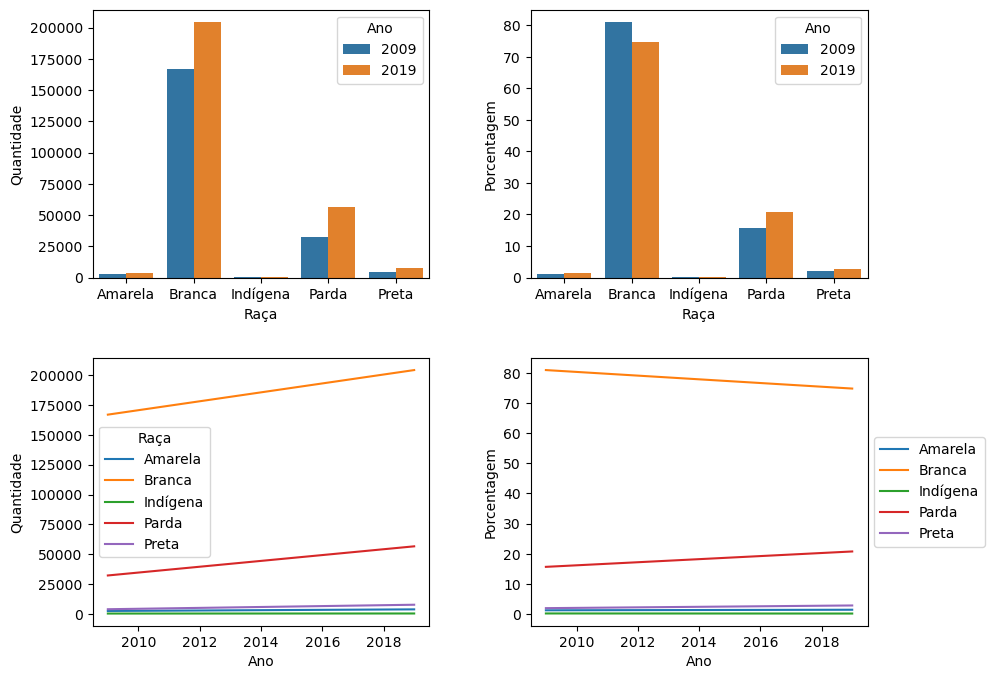

In [244]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.barplot(x="Raça", y="Quantidade", hue="Ano", data=count_by_race_and_year_df, ax=axs[0, 0])
sns.barplot(x="Raça", y="Porcentagem", hue="Ano", data=count_by_race_and_year_df, ax=axs[0,1])

sns.lineplot(x="Ano", y="Quantidade", hue="Raça", data=count_by_race_and_year_df, ax=axs[1,0])
sns.lineplot(x="Ano", y="Porcentagem", hue="Raça", data=count_by_race_and_year_df, ax=axs[1,1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

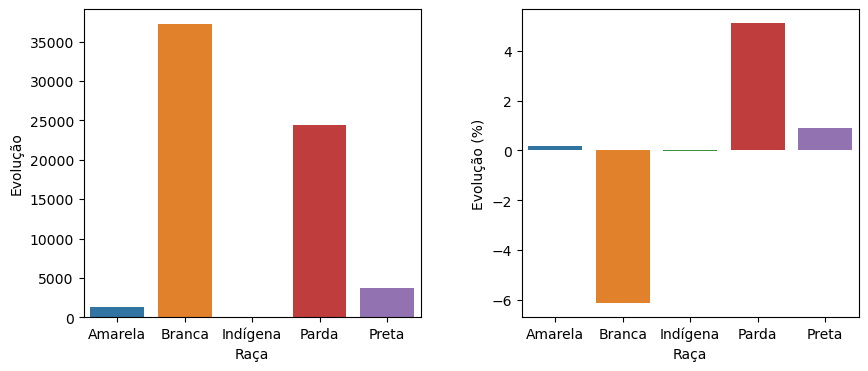

In [283]:


fig, axs = plt.subplots(ncols=2, figsize=(10,4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.barplot(x='Raça', y='Evolução', data=quantity_evolution_df, ax=axs[0])
sns.barplot(x='Raça', y='Evolução (%)', data=percentage_evolution_df, ax=axs[1])
plt.show()